▶ Processing header
#images		 60000
#rows		 28
#cols		 28
#pixels		 784 (28*28)
#labels		 60000
▶ Processing images
-----------------
Processing image with label 5


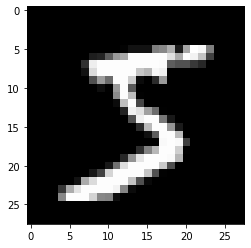

cost for this sample: 6536645621046.929
-----------------
Processing image with label 4


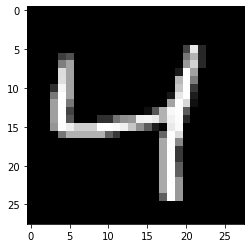

cost for this sample: 6536644877851.49
-----------------
Processing image with label 2


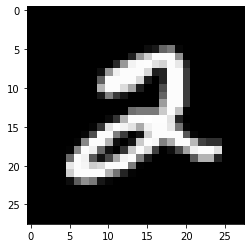

cost for this sample: 6536645436927.333
-----------------
Processing image with label 4


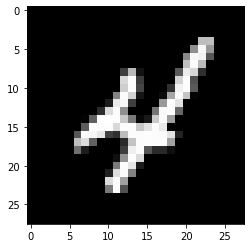

cost for this sample: 6536644877851.49
-----------------
Processing image with label 1


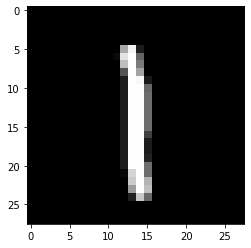

cost for this sample: 6536644804259.231
-----------------
Processing image with label 4


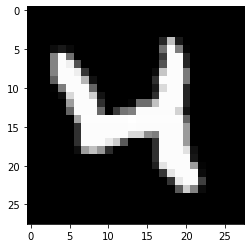

cost for this sample: 6536644877851.49
-----------------
Processing image with label 3


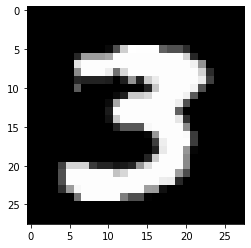

cost for this sample: 6536645495176.539
-----------------
Processing image with label 5


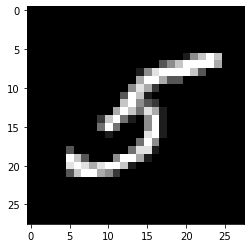

cost for this sample: 6536645621046.929
-----------------
Processing image with label 3


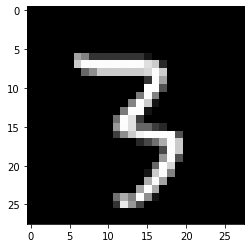

cost for this sample: 6536645495176.539
-----------------
Processing image with label 9


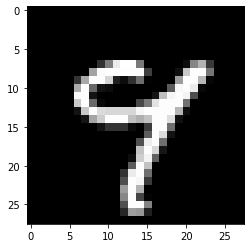

cost for this sample: 6536645135256.762
[[1.16326147e+011 1.81782337e+011 1.90742001e+011             nan
  3.16251369e+179 7.57272827e+150 2.46632238e+203 5.13458573e+198
  7.72192086e+227 9.31099165e+241 2.28272437e+242 5.99950017e+179
  1.48756960e+011 8.54516092e+193 2.00508400e+011 6.36828914e+150]
 [5.13458573e+198 1.67499957e+242 9.31099165e+241 2.28272437e+242
  1.68870917e+194 2.47839495e+011 2.23859075e+011 2.00674167e+011
  2.56170993e+011 1.70763857e+011 8.83397378e+198 4.38142894e+139
  7.37108894e+227 1.97642633e+011 3.42028076e+168 8.87707041e+251]
 [8.53978871e+010 4.90900643e+251 1.40028772e+011 1.16568549e+252
  7.49511203e+246 1.12284826e+218 1.54674619e+011 8.42244189e+251
  1.76999744e+011 1.17988018e+011 2.59549728e+250 7.30576096e+264
  1.11529837e+276 5.28028138e+255 1.47197663e+011 2.87505123e+160]
 [8.16997413e+010 1.27672161e+011 1.33964504e+011 1.50026333e+011
  1.63008568e+011 1.63827958e+011 2.02697730e+266 1.32650214e+011
  1.69335294e+011 1.46899939e+178

In [76]:
# MINST Dataset
# https://deepai.org/dataset/mnist

import matplotlib.pyplot as plt
import numpy as np
from random import randint

with open("mnist/train-images.idx3-ubyte", "r") as images,\
    open("mnist/train-labels.idx1-ubyte", "r") as labels:

    # --- Header (images)
    print('▶ Processing header')
    header_images = np.fromfile(images, dtype='>i', count=4) # big-endian integer (32-bit, 4 bytes)

    magic_number = header_images[0]
    img_count = header_images[1]
    row_count = header_images[2]
    col_count = header_images[3]
    pixel_count = row_count*col_count

    print(f"#images\t\t {img_count}")
    print(f"#rows\t\t {row_count}")
    print(f"#cols\t\t {col_count}")
    print(f"#pixels\t\t {pixel_count} ({row_count}*{col_count})")

    # --- Header (labels)
    header_labels = np.fromfile(labels, dtype='>i', count=2) # big-endian integer (32-bit, 4 bytes)
    magic_number = header_labels[0]
    label_count = header_labels[1]
    
    print(f"#labels\t\t {label_count}")


    # --- Show data samples (images & labels)
    # for i in range(1): # adjust to show more images
    #     i = randint(1, 100) # choose random image

    #     # Image
    #     img = np.fromfile(images, dtype=np.ubyte, count=28*28, offset=28*28*i)
    #     img = img.reshape((28, 28))
    #     imgplot = plt.imshow(img, cmap="gray")

    #     # Label
    #     label = np.fromfile(labels, dtype=np.ubyte, count=1, offset=i)[0]
    #     print(f"Label: {label}")

    #     plt.show()

    print('▶ Processing images')
    # --- Prepare for training & start

    batch_size = 10
    # for i in range(60000/batch_size):
    for i in range(1): # process 3 batches
        delC_delWeights_2_avg = np.empty(shape=weights_2.shape)
        delC_delWeights_3_avg = np.empty(shape=weights_3.shape)
        delC_delWeights_4_avg = np.empty(shape=weights_4.shape)

        delC_delBiases_2_avg = np.empty(shape=biases_2.shape)
        delC_delBiases_3_avg = np.empty(shape=biases_3.shape)
        delC_delBiases_4_avg = np.empty(shape=biases_4.shape)


        # --- Process one batch
        for i in range(batch_size):
            print('-----------------')

            # Image
            img_784 = np.fromfile(images, dtype=np.ubyte, count=28*28, offset=28*28*i)
            img = img_784.reshape((28, 28))
            imgplot = plt.imshow(img, cmap="gray")

            # Label
            label = np.fromfile(labels, dtype=np.ubyte, count=1, offset=i)[0]
            print(f"Processing image with label {label}")

            plt.show()


            # --- Feed through network to gain outputs
            # outputs = feed_forward(img_784)
            neurons2_z = weights_2 @ img_784 + biases_2
            neurons2 = activation_function(neurons2_z) # neurons2: (16,1)
            neurons3_z = weights_3 @ neurons2 + biases_3
            neurons3 = activation_function(neurons3_z) # neurons3: (16,1)
            neurons4_z = weights_4 @ neurons3 + biases_4
            neurons4 = activation_function(neurons4_z) # neurons4: (10,1)

            # --- Costs
            label_one_hot = encode_one_hot(label, 10) # there are 10 labels (digits from 0 to 9)
            cost = calc_cost(outputs, label_one_hot)
            print(f"cost for this sample: {cost}")

            # --- Calculate gradient for all 13.002 weights + biases
            # -- Layer4 (layer3---layer4)
            delC_delWeights_4 = np.empty(shape=weights_4.shape)
            delC_delBiases_4 = np.empty(shape=biases_4.shape)
            for j, w_j in enumerate(weights_4): # w_j comprises all weights for target j in layer4
                # b_j is the bias for target j in layer4
                delC_delActivation = 2*(neurons4[j]-label_one_hot[j])
                del_act_function = derive_activation_function(neurons4_z[j])
                bias = delC_delActivation * del_act_function
                delC_delBiases_4[j] = bias
                for k, w_jk in enumerate(w_j): # w_jk is an element of w_j
                    prev_activation = neurons3[k]
                    delC_delWeights_4[j][k] = bias * prev_activation

            # -- Layer3 (layer2---layer3)
            delC_delWeights_3 = np.empty(shape=weights_3.shape)
            delC_delBiases_3 = np.empty(shape=biases_3.shape)
            for j, w_j in enumerate(weights_3): # w_j comprises all weights for target j in layer3
                # b_j is the bias for target j in layer3
                del_act_function = derive_activation_function(neurons3_z[j])
                for k, w_jk in enumerate(w_j): # w_jk is an element of w_j
                    delC_delActivation = np.sum(delC_delBiases_4 * weights_4[:,j])
                    bias = delC_delActivation * del_act_function
                    delC_delBiases_3[j] = bias

                    prev_activation = neurons2[k]
                    delC_delWeights_3[j][k] = bias * prev_activation

            # -- Layer2 (layer1---layer2)
            delC_delWeights_2 = np.empty(shape=weights_2.shape)
            delC_delBiases_2 = np.empty(shape=biases_2.shape)
            for j, w_j in enumerate(weights_2): # w_j comprises all weights for target j in layer2
                # b_j is the bias for target j in layer2
                del_act_function = derive_activation_function(neurons2_z[j])
                for k, w_jk in enumerate(w_j): # w_jk is an element of w_j
                    delC_delActivation = np.sum(delC_delBiases_3 * weights_3[:,j])
                    bias = delC_delActivation * del_act_function
                    delC_delBiases_2[j] = bias

                    prev_activation = img_784[k]
                    delC_delWeights_2[j][k] = bias * prev_activation

            # --- Add to overall
            delC_delWeights_2_avg += delC_delWeights_2
            delC_delWeights_3_avg += delC_delWeights_3
            delC_delWeights_4_avg += delC_delWeights_4

            delC_delBiases_2_avg += delC_delBiases_2
            delC_delBiases_3_avg += delC_delBiases_3
            delC_delBiases_4_avg += delC_delBiases_4
        

        # --- Calculate average for this batch
        delC_delWeights_2_avg /= batch_size
        delC_delWeights_3_avg /= batch_size
        delC_delWeights_4_avg /= batch_size

        delC_delBiases_2_avg /= batch_size
        delC_delBiases_3_avg /= batch_size
        delC_delBiases_4_avg /= batch_size

        print(delC_delWeights_4_avg)
        print(delC_delBiases_4_avg)

        # --- Small steps to right direction
        



In [40]:
# --- Our model

# First layer:      784 neurons (pixels of our image with gray-scale values from 0..255)
# Hidden Layer 1:   16 neurons
# Hidden Layer 2:   16 neurons
# Output Layer:     10 layers (representing number 0..9)

# Layer1 ------------------- Layer2 ------------------- Layer3 ------------------- Layer4
# 784 (28*28)                  16                        16                   10 (digits 0-9)              <- #neurons
# input layer               hidden layer 1          hidden layer 2              output layer

#           784*16 weights                16*16 weights           16*10 weights                            <- #weights
#               16 biases                    16 biases               10 biases                             <- #biases
#          weights_2, biases_2         weights_3, biases_3      weights_4, biases_4


# --- Init params (comprise weights and biases)
weights_2 = np.random.rand(16, 784)
biases_2 = np.random.rand(16)

weights_3 = np.random.rand(16, 16)
biases_3 = np.random.rand(16)

weights_4 = np.random.rand(10, 16)
biases_4 = np.random.rand(10)

# do this as instance variables later on
neurons2 = None
neurons3 = None
neurons4 = None

In [ ]:
img_rand = np.random.randint(0,256, size=(784))
print(img_rand)

In [41]:
def feed_forward(img):
    """Feed through neural network. Returns the activation of the output layer (10-dim layer)"""
    neurons2 = activation_function(weights_2 @ img + biases_2) # neurons2: (16,1)
    neurons3 = activation_function(weights_3 @ neurons2 + biases_3) # neurons3: (16,1)
    neurons4 = activation_function(weights_4 @ neurons3 + biases_4) # neurons4: (10,1)
    return neurons4

# --- Test with random images
# img_rand = np.random.randint(0,256, size=(784))
# outputs = feed_forward(img_rand, label=8)
# print(outputs)

# --- Test witht the first two images
img1 = np.fromfile("mnist/train-images.idx3-ubyte", dtype=np.ubyte, count=28*28, offset=28*28*0)
img2 = np.fromfile("mnist/train-images.idx3-ubyte", dtype=np.ubyte, count=28*28, offset=28*28*1)
outputs1 = feed_forward(img1)
outputs2 = feed_forward(img2)
print(outputs1)
print(outputs2)
print('---------------- Difference:')
print(outputs2-outputs1)


[ 975222.86739996 1034613.24890504  715950.54060342  685489.25677853
  999302.50706467  621232.17157923  598823.76787091  811325.07771958
  752390.93751729  868785.56547644]
[1094115.55740054 1159893.27523458  802126.96299184  767651.79418427
 1119338.92254169  694758.76103982  671130.13638339  908876.98646284
  842428.43111998  972817.55285065]
---------------- Difference:
[118892.69000057 125280.02632954  86176.42238842  82162.53740574
 120036.41547702  73526.5894606   72306.36851248  97551.90874326
  90037.49360269 104031.98737421]


In [8]:
def train(img, label):
    # Start training
    outputs = feed_forward(img)
    label_one_hot = encode_one_hot(label, 10) # there are 10 labels (digits from 0 to 9)
    cost = calc_cost(outputs, label_one_hot)
    print(f"costs for this sample: {cost}")

In [50]:
def normalize(x):
    """Normalizes the array x"""
    return x / max(x)

def sigmoid(x):
    "Numerically stable sigmoid function."
    if x >= 0:
        z = np.exp(-x)
        return 1 / (1 + z)
    else:
        # if x is less than zero then z will be small, denom can't be
        # zero because it's 1+z.
        z = np.exp(x)
        return z / (1 + z)

def activation_function(x_vector):
    # sigmoid
    # return np.array([sigmoid(xi) for xi in x_vector])

    # relu
    relu = lambda x: max(0.0, x)
    return  np.array([relu(xi) for xi in x_vector])

def derive_activation_function(x):
    if x > 0:
        return 1
    else:
        return 0

In [6]:
def encode_one_hot(x, size):
    return np.eye(size)[x]

def calc_cost(outputs, desired):
    return np.sum((outputs-desired)**2)

In [786]:
cost = calc_cost(np.array([1,2,3,4,5]), np.array([2,2,3,4,7]))
print(cost)

5


In [803]:
one_hot_test = encode_one_hot(1, 10)
print(one_hot_test)

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
